#STEP 1: IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import xgboost
import warnings

warnings.filterwarnings('ignore')

#STEP 2: LOAD IN THE DATASET (INSURANCE TRAIN DATASET)

In [2]:
Insurance_Train_Data = pd.read_csv('datasets/Train_data.csv')
Insurance_Train_Data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


#STEP 3: DATA CLEANING AND PREPROCESSING

In [3]:
#Having an overview of the first few rows of the dataset 
Insurance_Train_Data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [50]:
#Check the FEATURES)to see which is object(str: categorical) and/or numbers(int: numeric)
Insurance_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [4]:
#Remove inconsistencies noticed at the column labels
Insurance_Train_Data.columns = (
    Insurance_Train_Data.columns
    .str.strip()                #Remove trailing and leading spaces
    .str.lower()       #lowercase
    .str.replace(' ', '_')      #Replace spaces with underscores
)

In [52]:
Insurance_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7160 non-null   object 
 1   yearofobservation   7160 non-null   int64  
 2   insured_period      7160 non-null   float64
 3   residential         7160 non-null   int64  
 4   building_painted    7160 non-null   object 
 5   building_fenced     7160 non-null   object 
 6   garden              7153 non-null   object 
 7   settlement          7160 non-null   object 
 8   building_dimension  7054 non-null   float64
 9   building_type       7160 non-null   int64  
 10  date_of_occupancy   6652 non-null   float64
 11  numberofwindows     7160 non-null   object 
 12  geo_code            7058 non-null   object 
 13  claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [5]:
#To check the total number of rows and coluns

Insurance_Train_Data.shape

(7160, 14)

In [6]:
#Inspecting total number of duplicates in the dataset
Insurance_Train_Data.duplicated().sum()

np.int64(0)

In [7]:
#Inspecting empty cells
Insurance_Train_Data.isnull().sum()     
# 4 Features was observed to contain empty cell and would be filled since empty cells are less than 50%

customer_id             0
yearofobservation       0
insured_period          0
residential             0
building_painted        0
building_fenced         0
garden                  7
settlement              0
building_dimension    106
building_type           0
date_of_occupancy     508
numberofwindows         0
geo_code              102
claim                   0
dtype: int64

In [8]:
#Replace missing values that has "." with NaN
Insurance_Train_Data.replace('.', np.nan, inplace=True)

In [9]:
#Convert columns to numeric data types
Insurance_Train_Data['building_dimension'] = pd.to_numeric(Insurance_Train_Data['building_dimension'], errors='coerce')
Insurance_Train_Data['date_of_occupancy'] = pd.to_numeric(Insurance_Train_Data['date_of_occupancy'], errors='coerce')


In [10]:
#Fill missing Years using the Groupby Median strategy

Insurance_Train_Data['date_of_occupancy'] = Insurance_Train_Data['date_of_occupancy'].fillna(
    Insurance_Train_Data.groupby('building_type')['date_of_occupancy'].transform('median')
)

In [11]:
#Fill missing building_dimensios using Median
Insurance_Train_Data['building_dimension'].fillna(Insurance_Train_Data['building_dimension'].median(), inplace=True)


In [12]:
# Empty cells in categorical columns: fill with 'Unknown'
cat_cols = Insurance_Train_Data.select_dtypes(include=['object']).columns
Insurance_Train_Data[cat_cols] = Insurance_Train_Data[cat_cols].fillna('Unknown')


In [13]:
#Create a new column "Building Age"
Insurance_Train_Data['building_age'] = Insurance_Train_Data['yearofobservation'] - Insurance_Train_Data['date_of_occupancy']

#Fix any future occupancy dates (negative ages) to 0
Insurance_Train_Data['building_age'] = Insurance_Train_Data['building_age'].clip(lower=0)

In [14]:
#Check data types present in the dataset
Insurance_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7160 non-null   object 
 1   yearofobservation   7160 non-null   int64  
 2   insured_period      7160 non-null   float64
 3   residential         7160 non-null   int64  
 4   building_painted    7160 non-null   object 
 5   building_fenced     7160 non-null   object 
 6   garden              7160 non-null   object 
 7   settlement          7160 non-null   object 
 8   building_dimension  7160 non-null   float64
 9   building_type       7160 non-null   int64  
 10  date_of_occupancy   7160 non-null   float64
 11  numberofwindows     7160 non-null   object 
 12  geo_code            7160 non-null   object 
 13  claim               7160 non-null   int64  
 14  building_age        7160 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 839.2+

#STEP 4: EXPLORATORY DATA ANALYSIS

In [15]:
#Identify Data Colunms type
cat_col = [col for col in Insurance_Train_Data.columns if Insurance_Train_Data[col].dtype == 'object']
num_col = [col for col in Insurance_Train_Data.columns if Insurance_Train_Data[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['customer_id', 'building_painted', 'building_fenced', 'garden', 'settlement', 'numberofwindows', 'geo_code']
Numerical columns: ['yearofobservation', 'insured_period', 'residential', 'building_dimension', 'building_type', 'date_of_occupancy', 'claim', 'building_age']


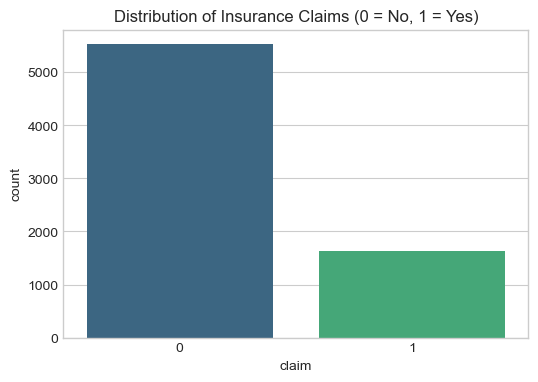

In [121]:
# Plot of target variable(Claim) distribution

plt.figure(figsize=(6,4))
sns.countplot(x='claim', data=Insurance_Train_Data, palette='viridis')
plt.title('Distribution of Insurance Claims (0 = No, 1 = Yes)')
plt.savefig('Distribution of Insurance Claims.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
# Define the crucial numerical features for outliers
num_cols = ['building_dimension', 'building_type', 'building_age'] 

print("--- Outlier Detection Summary ---")
for col in num_cols:
    #Calculate IQR
    Q1 = Insurance_Train_Data[col].quantile(0.25)
    Q3 = Insurance_Train_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    #Define Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Count Outliers
    outliers_count = Insurance_Train_Data[(Insurance_Train_Data[col] < lower_bound) | (Insurance_Train_Data[col] > upper_bound)].shape[0]
    
    print(f"Column: {col}")
    print(f"  - IQR: {IQR}")
    print(f"  - Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Total Outliers: {outliers_count}")
    print("-" * 30)


--- Outlier Detection Summary ---
Column: building_dimension
  - IQR: 1718.5
  - Bounds: [-2046.25, 4827.75]
  - Total Outliers: 572
------------------------------
Column: building_type
  - IQR: 1.0
  - Bounds: [0.50, 4.50]
  - Total Outliers: 0
------------------------------
Column: building_age
  - IQR: 23.0
  - Bounds: [-2.50, 89.50]
  - Total Outliers: 704
------------------------------


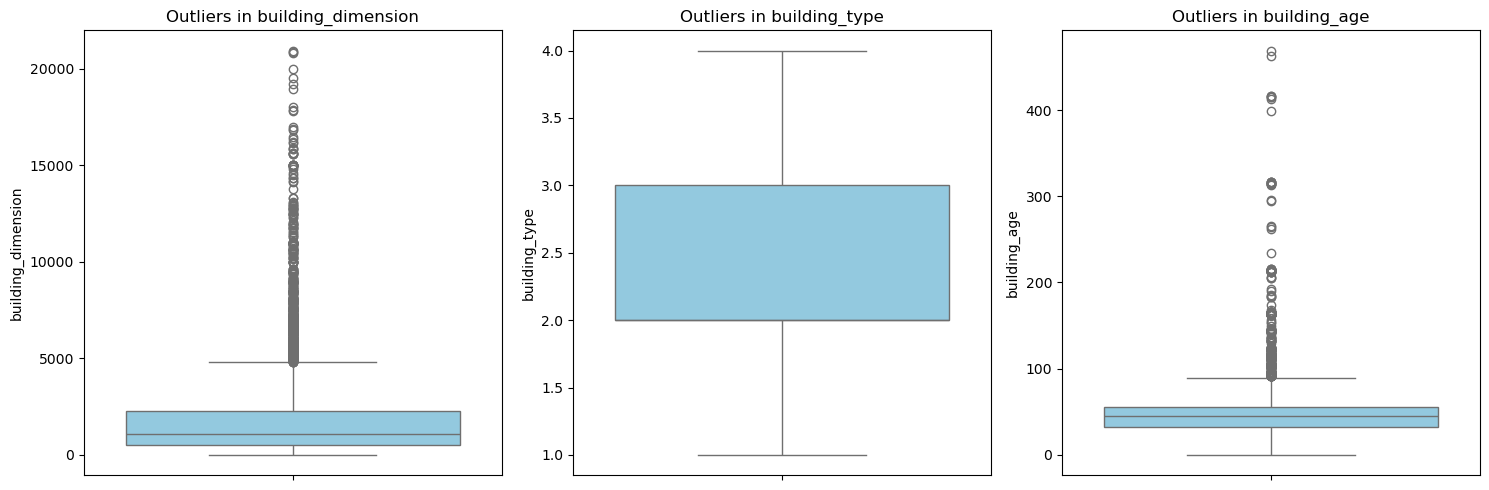

In [17]:
#Create a figure with subplots for each variable
plt.figure(figsize=(15, 5))

# Generate the box plot
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=Insurance_Train_Data[col], color='skyblue')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.savefig('Distribution of Outliers.png', dpi=300)
plt.show()


In [67]:
#define the capping function

def cap_outliers(Insurance_Train_Data, columns):
    for col in columns:
        Q1 = Insurance_Train_Data[col].quantile(0.25)
        Q3 = Insurance_Train_Data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Capping values outside the bounds
        Insurance_Train_Data[col] = np.clip(Insurance_Train_Data[col], lower_bound, upper_bound)
    return Insurance_Train_Data

# Execute the capping
Insurance_Train_Data = cap_outliers(Insurance_Train_Data, num_cols)
print("Outliers have been capped successfully.")



Outliers have been capped successfully.


In [68]:
#At the bivariate analysis step, i discover that there some hidden inconsistencies

#Force the Building Dimension column to be numerical
Insurance_Train_Data['building_dimension'] = pd.to_numeric(Insurance_Train_Data['building_dimension'], errors='coerce')

#Check number of strings turned into NaN
print(f"Number of non-numeric values found: {Insurance_Train_Data['building_dimension'].isna().sum()}")

Number of non-numeric values found: 0


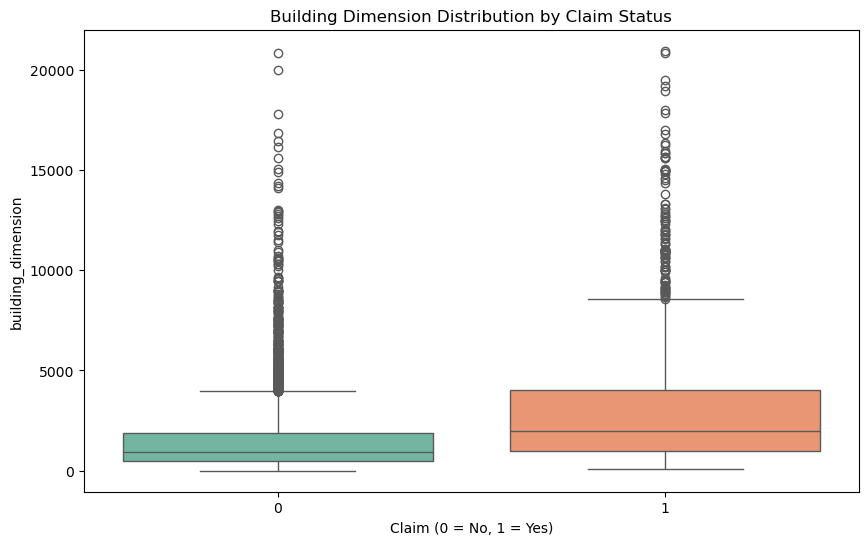

In [18]:
#BIVARIATE ANALYSIS

#1. (Numerical vs Target);
#Box plot to analyze Claims by Building dimension; 
#To check if larger buildings have a higher probability of filing an insurance claim

plt.figure(figsize=(10, 6))
sns.boxplot(x='claim', y='building_dimension', data=Insurance_Train_Data, palette='Set2')
plt.title('Building Dimension Distribution by Claim Status')
plt.xlabel('Claim (0 = No, 1 = Yes)')
plt.ylabel('building_dimension')
plt.savefig('Building dimension distribution by claim.png', dpi=300)
plt.show()


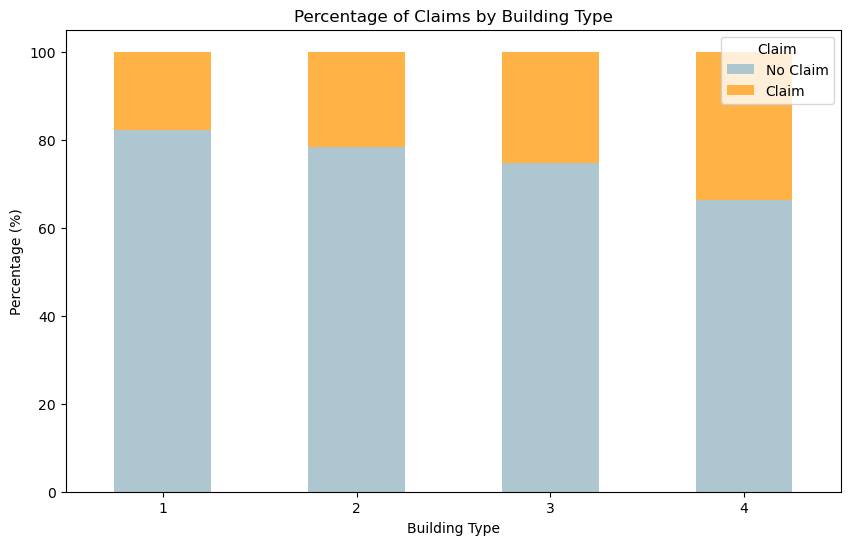

In [19]:
#2. (Categorical vs. Target)
#Stack bar chat to analyze Building Type vs. Claim; 
#To show which type of building is "High Risk.

# Grouping the data to see percentages
type_claim_pct = pd.crosstab(Insurance_Train_Data['building_type'], Insurance_Train_Data['claim'], normalize='index') * 100

type_claim_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#aec6cf', '#ffb347'])
plt.title('Percentage of Claims by Building Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Building Type')
plt.legend(title='Claim', labels=['No Claim', 'Claim'])
plt.xticks(rotation=0)
plt.savefig('Percentage of Claims by Building Type.png', dpi=300)
plt.show()



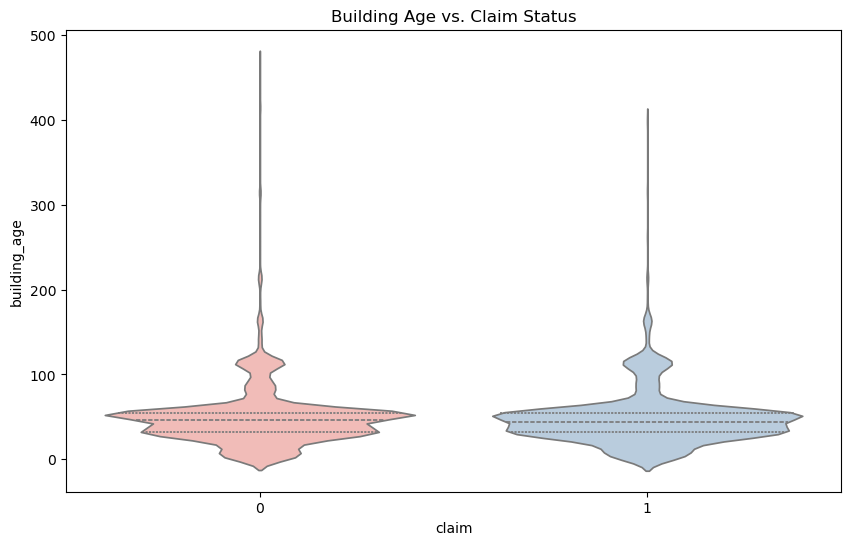

In [20]:
#3. (Numerical vs. Target)
#Violin plot to analyze Building Age vs. Claim; 
#To see if the risk is higher for very old buildings versus brand-new ones.

plt.figure(figsize=(10, 6))

# Using a Violin plot to see the density and distribution at once
sns.violinplot(x='claim', y='building_age', data=Insurance_Train_Data, inner="quartile", palette='Pastel1')
plt.title('Building Age vs. Claim Status')
plt.savefig('Building Age vs Claims.png', dpi=300)
plt.show()


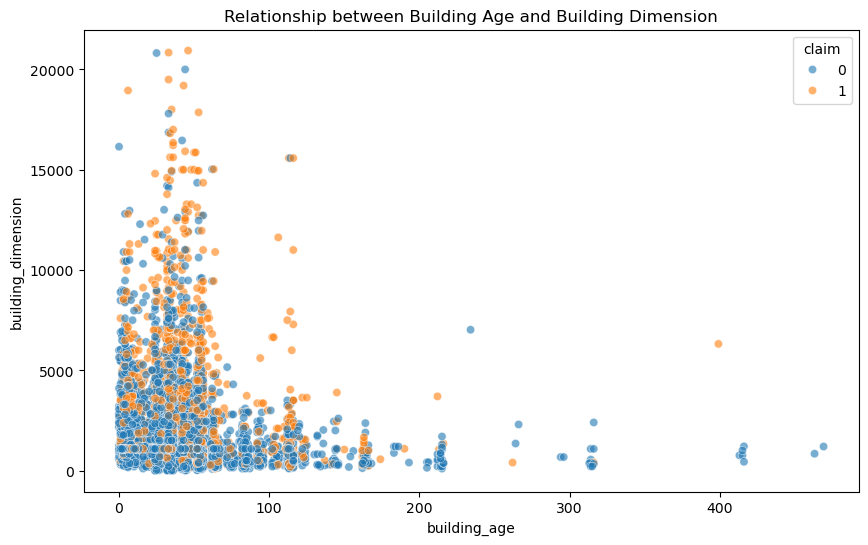

In [21]:
#4. (Numerical vs. Numerical)
#Scatter plot to analyze Buildiing Dimension vs. Age; 
#To check how the features relate to each other. 
#This is important to ensure we don't have redundant data (multi-collinearity).

plt.figure(figsize=(10, 6))
sns.scatterplot(x='building_age', y='building_dimension', hue='claim', data=Insurance_Train_Data, alpha=0.6)
plt.title('Relationship between Building Age and Building Dimension')
plt.savefig('Building Age vs Building Dimension.png', dpi=300)
plt.show()


#5 FEATURE ENFINEERING

In [22]:
#Mapping and Encoding Categorical columns

#Mapping some of the cartegorical coliumns
Insurance_Train_Data['building_painted'] = Insurance_Train_Data['building_painted'].map({'N': 1, 'V': 1})
Insurance_Train_Data['building_fenced'] = Insurance_Train_Data['building_fenced'].map({'N': 0, 'V': 1})
Insurance_Train_Data['garden'] = Insurance_Train_Data['garden'].map({'V': 1, 'O': 0})
Insurance_Train_Data['settlement'] = Insurance_Train_Data['settlement'].map({'U': 1, 'R': 0})

# Using Label Encoder to encode Building Type column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Insurance_Train_Data['building_type'] = le.fit_transform(Insurance_Train_Data['building_type'].astype(str))



In [23]:
#Adjusting the >=10 values in Number of windows column
#Strip any leading/trailing spaces
Insurance_Train_Data['numberofwindows'] = Insurance_Train_Data['numberofwindows'].astype(str).str.strip()

#Replace '>=10' with '10'
Insurance_Train_Data['numberofwindows'] = Insurance_Train_Data['numberofwindows'].replace('>=10', '10')

#Convert to numeric
Insurance_Train_Data['numberofwindows'] = pd.to_numeric(Insurance_Train_Data['numberofwindows'], errors='coerce')

#Fill the gaps (NaNs) with the median
Insurance_Train_Data['numberofwindows'] = Insurance_Train_Data['numberofwindows'].fillna(Insurance_Train_Data['numberofwindows'].median())

#Convert to integer
Insurance_Train_Data['numberofwindows'] = Insurance_Train_Data['numberofwindows'].astype


In [24]:
#Drop the Customer ID column
customer_ids = Insurance_Train_Data['customer_id']
Insurance_Train_Data.drop('customer_id', axis=1, inplace=True)
print("Customer_ID has been removed")

Customer_ID has been removed


In [25]:
#Cross check the nulls once again
Insurance_Train_Data.isnull().sum()

yearofobservation     0
insured_period        0
residential           0
building_painted      0
building_fenced       0
garden                7
settlement            0
building_dimension    0
building_type         0
date_of_occupancy     0
numberofwindows       0
geo_code              0
claim                 0
building_age          0
dtype: int64

In [26]:
#Fill up the null values in "Garden"
garden_mode = Insurance_Train_Data['garden'].mode()[0]
Insurance_Train_Data['garden'] = Insurance_Train_Data['garden'].fillna(garden_mode)

print(f"garden nulls after filling: {Insurance_Train_Data['garden'].isnull().sum()}")

garden nulls after filling: 0


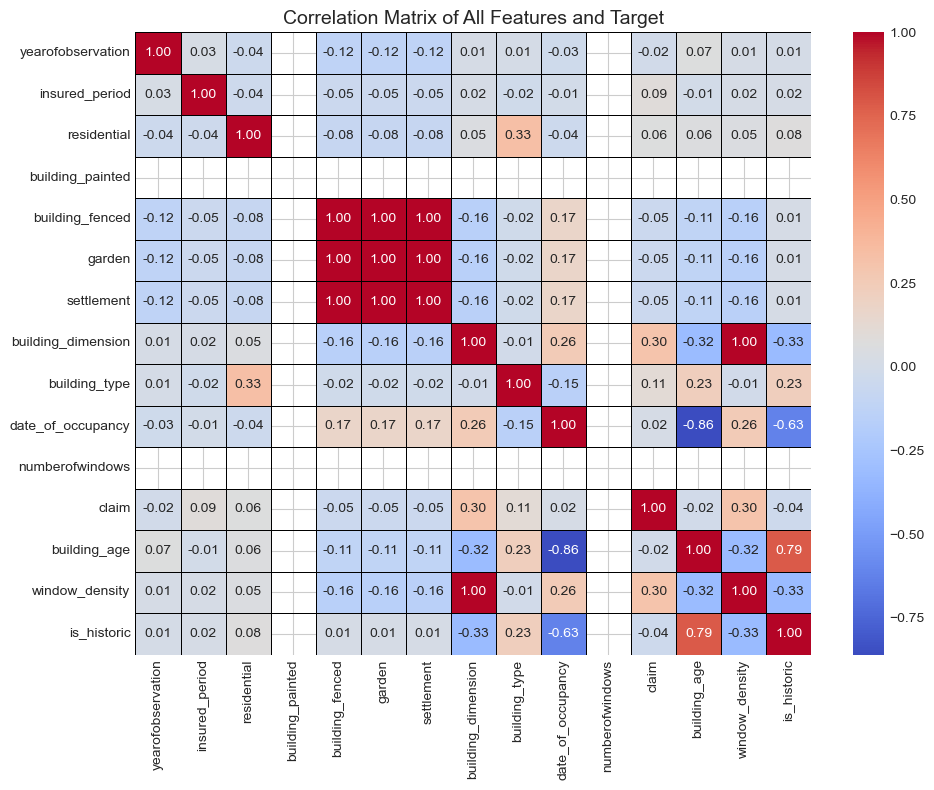

In [128]:
#. Correlation over our Target. 
#Plot heatmap to visualize correlation

# Select all remaining numerical/binary columns for the correlation matrix
numerical_Insurance_Train_Data = Insurance_Train_Data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
corr_matrix = numerical_Insurance_Train_Data.corr()

# Generate the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=.5, 
    linecolor='black'
)
plt.title('Correlation Matrix of All Features and Target', fontsize=14)
plt.tight_layout()
plt.savefig('Correlation Matrix.png', dpi=300)
plt.show()

In [27]:
#FUTURE ENGINEERING 
#Create new features (Density: Dimension divided by number of windows)
Insurance_Train_Data['numberofwindows'] = pd.to_numeric(Insurance_Train_Data['numberofwindows'], errors='coerce').fillna(0)
Insurance_Train_Data['window_density'] = Insurance_Train_Data['building_dimension'] / (Insurance_Train_Data['numberofwindows'] + 1)

# Create a new feature: Is_Histotic (Binary flag for buildings older than, say, 50 years)
#If the building was 50yrs or older asat the time of observation
Insurance_Train_Data['is_historic'] = (Insurance_Train_Data['building_age'] > 50).astype(int)

#View the distribution
print(Insurance_Train_Data['is_historic'].value_counts())



is_historic
0    3757
1    3403
Name: count, dtype: int64


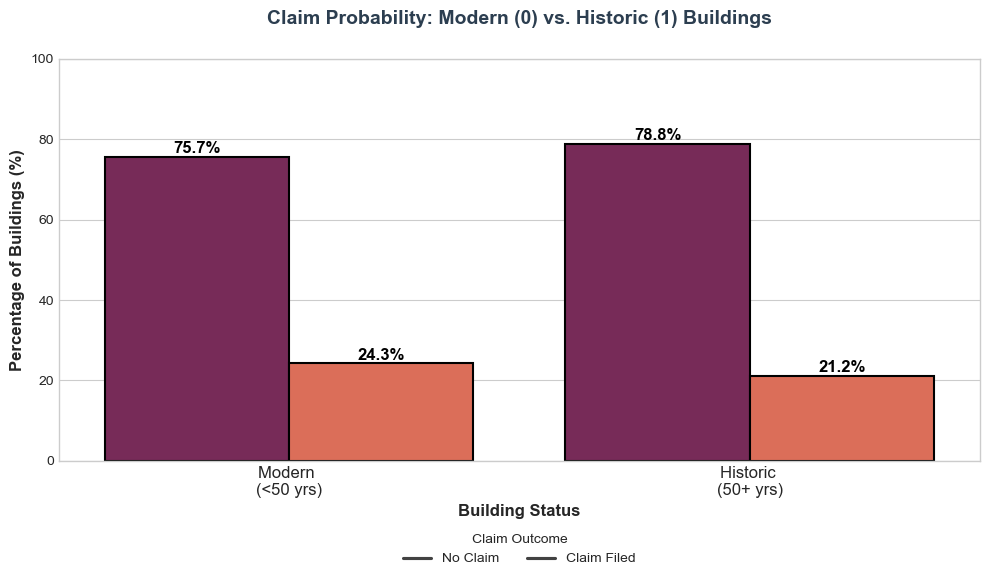

In [28]:
#To validate the success of the Feature engineering
#Barplot to visualize Claim rate vs Building status

# This shows the percentage of claims within each group (Historic vs Modern)

plot_Insurance_Train_Data = Insurance_Train_Data.groupby('is_historic')['claim'].value_counts(normalize=True).rename('Percentage').reset_index()
plot_Insurance_Train_Data['Percentage'] *= 100 # Convert to 0-100 scale

#The plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='is_historic', 
                 y='Percentage', 
                 hue='claim', 
                 data=plot_Insurance_Train_Data, 
                 palette='rocket',
                 edgecolor='black',
                 linewidth=1.5
                )

plt.title('Claim Probability: Modern (0) vs. Historic (1) Buildings', fontsize=14, fontweight='bold', pad=25, color='#2c3e50')
plt.xlabel('Building Status', fontsize=12, fontweight='semibold')
plt.ylabel('Percentage of Buildings (%)', fontsize=12, fontweight='semibold')
plt.xticks([0, 1], ['Modern \n(<50 yrs)', 'Historic \n(50+ yrs)'], fontsize=12)
plt.legend(title='Claim Failed', labels=['No', 'Yes'])
plt.ylim(0, 100)

for p in ax.patches:
    height = p.get_height()
    if height > 0: # Only label bars with values
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height + 2), 
                    ha='center', va='center', 
                    fontsize=12, fontweight='bold', color='black')

plt.legend(title='Claim Outcome', labels=['No Claim', 'Claim Filed'], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.savefig('Claims Probability.png', dpi=300)
plt.show()


In [33]:
#Define the feature and target variables (X and y)
#Drop Year of Observation and Date of occupancy colums to prevent "Data leakage" or Redundancy

X = Insurance_Train_Data.drop(columns=['yearofobservation', 'date_of_occupancy', 'claim'], axis = 1)#Features/ independent variables
y = Insurance_Train_Data['claim']  #Taget/Dependent variable


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix, recall_score


In [34]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")



Training set size: 5012 rows
Testing set size: 2148 rows


In [35]:
#To fix "Unknown" string error i encountered during the scaling phase

X = X.apply(pd.to_numeric, errors='coerce')  #Force every column to be numeric
X = X.fillna(X.median())     #Fill the NaNs with median
print("Remaning Nulls/Strings:", X.isnull().sum())


Remaning Nulls/Strings: insured_period        0
residential           0
building_painted      0
building_fenced       0
garden                0
settlement            0
building_dimension    0
building_type         0
numberofwindows       0
geo_code              0
building_age          0
window_density        0
is_historic           0
dtype: int64


In [36]:
X['insured_period'] = pd.to_numeric(X['insured_period'], errors='coerce')  #Force every column to be numeric
X['insured_period'] = X['insured_period'].fillna(X['insured_period'].median())     #Fill the NaNs with median
print("Any null left anywhere?")
print(X.isnull().sum())


Any null left anywhere?
insured_period        0
residential           0
building_painted      0
building_fenced       0
garden                0
settlement            0
building_dimension    0
building_type         0
numberofwindows       0
geo_code              0
building_age          0
window_density        0
is_historic           0
dtype: int64


In [37]:
print("Unknown" in X.values)

False


In [38]:
#To fix "Unknown" string error i encountered during the scaling phase

X_numeric = X.apply(pd.to_numeric, errors='coerce')  #Force every column to be numeric
cols_with_strings = X.columns[X_numeric.isna().any()].tolist()
print(f"The hidden strings were in: {cols_with_strings}")
X_final = X_numeric.fillna(X_numeric.median())     #Fill the NaNs with median


The hidden strings were in: []


In [39]:
#Feature Scaling
#Using Standard Scaler

X_array = X_final.values.astype(float)
# Creates data with Mean = 0 and Standard Deviation = 1.
#Initialize Scaler
final_scaler = StandardScaler()

# 1. FIT and TRANSFORM the array! (Learning the mean and variance from training data)
X_scaled = final_scaler.fit_transform(X_array)

print("Shape of scaled data:", X_scaled.shape)
print("Success! Data is perfectly cleaned and scaled" )

Shape of scaled data: (7160, 13)
Success! Data is perfectly cleaned and scaled


In [40]:
y_numeric = pd.to_numeric(y, errors='coerce').fillna(0).astype(int)

X_final_cleaned = X_scaled  #Use the X scale
y_final_cleaned = y_numeric.astype(int)

print(f"Original rows: {len(y)}")
print(f"Cleaned rows: {len(y_final_cleaned)}")
print(f"Unique values in Target: {y_final_cleaned.unique()}")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric)


Original rows: 7160
Cleaned rows: 7160
Unique values in Target: [0 1]


#STEP 6: MODEL TRAINING

#A. LOGISTICS REGRESSION MODEL

In [41]:

#Initialize the model
log_model = LogisticRegression(
    max_iter=1000, 
    random_state=42, 
    class_weight='balanced',
    solver='liblinear'
)
                

#Train the model
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
#Make Prediction
log_preds = log_model.predict(X_test)

print(f"Logistics Regression Training Complete!")
print(f"Accuracy: {accuracy_score(y_test, log_preds):.2%}")

Logistics Regression Training Complete!
Accuracy: 71.37%


In [43]:

#Calculate individual metrics for claim

precision = precision_score(y_test, log_preds, pos_label=1)
f1 = f1_score(y_test, log_preds, pos_label=1)
recall = recall_score(y_test, log_preds)

print(f"--- Logistic Regression Performance ---")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")


print("\n--- Full Classification Report ---")
print(classification_report(y_test, log_preds))


--- Logistic Regression Performance ---
Precision: 0.4052
F1 Score: 0.4648
Recall: 0.5449

--- Full Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1658
           1       0.41      0.54      0.46       490

    accuracy                           0.71      2148
   macro avg       0.63      0.65      0.63      2148
weighted avg       0.75      0.71      0.73      2148



#B RANDOM FOREST MODEL

In [44]:
#Initialize the model (Random forest)
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_features="sqrt", 
    max_depth=6, 
    max_leaf_nodes=6,
   class_weight='balanced'
)

#Train the model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,6
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
#Make Prediction
rf_preds = rf_model.predict(X_test)

print(f"Random Forest Training Complete!")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2%}")

Random Forest Training Complete!
Accuracy: 71.60%


In [46]:

#Calculate individual metrics for claim

precision = precision_score(y_test, rf_preds, pos_label=1)
f1 = f1_score(y_test, rf_preds, pos_label=1)
recall = recall_score(y_test, rf_preds)

print(f"--- Random Forest Performance ---")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")


print("\n--- Full Classification Report ---")
print(classification_report(y_test, rf_preds))


--- Random Forest Performance ---
Precision: 0.4029
F1 Score: 0.4495
Recall: 0.5082

--- Full Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1658
           1       0.40      0.51      0.45       490

    accuracy                           0.72      2148
   macro avg       0.62      0.64      0.63      2148
weighted avg       0.74      0.72      0.73      2148



#C. XGBOOST 

In [47]:
#Library installation and testing
import platform
print(platform.architecture())

import xgboost
print(xgboost.__version__)

('64bit', '')
3.1.2


In [48]:
#Import the library
from xgboost import XGBClassifier

#Initialization
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'    
)

#Train the model
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [49]:
#Cross Validation Using k-Fold on the training data
#5-Fold Cross validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1')

print(f"All CV F1-Scores: {cv_scores}")
print(f"Mean F1-Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

#Check stability
if np.std(cv_scores) > 0.05:
    print("Model score are inconsistent. It might be overfitting!")
else:
    print("Model is stable across different data samples.")


All CV F1-Scores: [0.31023102 0.30201342 0.29746835 0.32716049 0.33021807]
Mean F1-Score: 0.3134
Standard Deviation: 0.0132
Model is stable across different data samples.


In [50]:
#Predictions
xgb_preds = xgb_model.predict(X_test)

print("--- XGBoost Classification Report ---")
print(classification_report(y_test, xgb_preds))
print(f"Overall Accuracy: {accuracy_score(y_test, xgb_preds):.2%}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1658
           1       0.58      0.21      0.30       490

    accuracy                           0.78      2148
   macro avg       0.69      0.58      0.59      2148
weighted avg       0.75      0.78      0.74      2148

Overall Accuracy: 78.45%
Precision: 0.4029
F1 Score: 0.4495
Recall: 0.5082


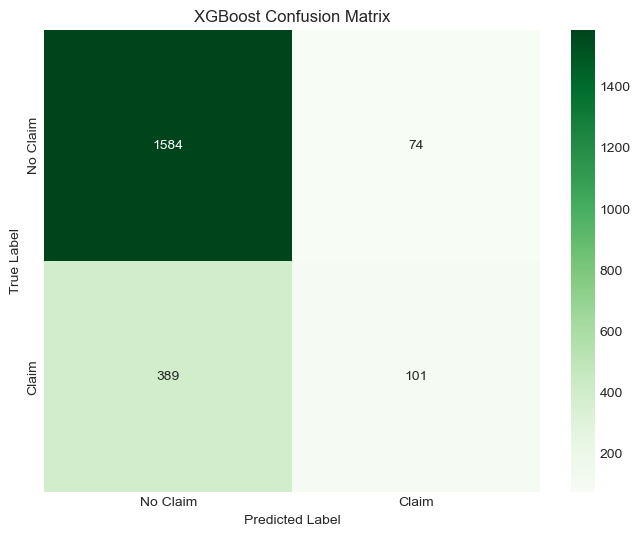

In [51]:
#Confusion Matrix to validate the model

#Create heat map
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, xgb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.savefig('Confusion Matrix.png', dpi=300)
plt.show()
            

In [52]:
#COMPARING RESULTS FROM THE 3 MODELS FOR CLARITY

# Using predictions from the 3trained models
# log_preds (Logistic), rf_preds (Random Forest), xgb_preds (XGBoost)

models = {
    "Logistic Regression": log_preds,
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds
}

# I'm creating an empty list to store metrics
comparison_list = []

for name, preds in models.items():
    comparison_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    })

# Convert to a DataFrame for a clean table
comparison_Insurance_Train_Data = pd.DataFrame(comparison_list)

# Highlight the best scores
print("--- Model Comparison Leaderboard ---")
print(comparison_Insurance_Train_Data.sort_values(by="F1-Score", ascending=False))



--- Model Comparison Leaderboard ---
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.713687   0.405159  0.544898  0.464752
1        Random Forest  0.716015   0.402913  0.508163  0.449458
2              XGBoost  0.784451   0.577143  0.206122  0.303759


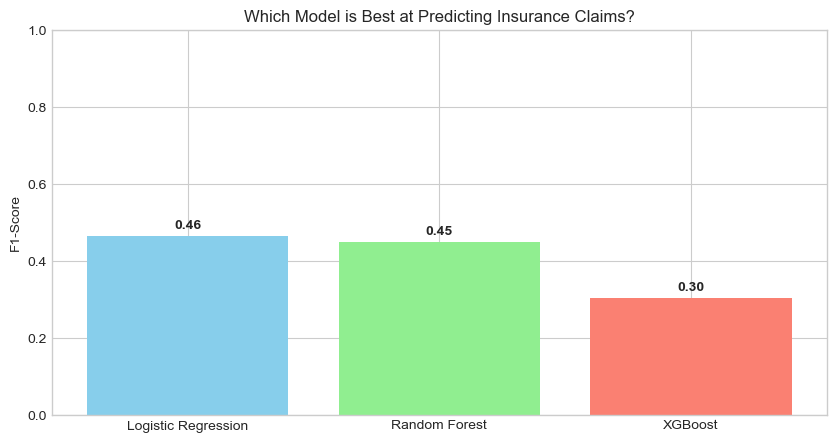

In [53]:
#Visualisation of the Performance gap

# Plotting F1-Score comparison
plt.figure(figsize=(10, 5))
plt.bar(comparison_Insurance_Train_Data['Model'], comparison_Insurance_Train_Data['F1-Score'], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('F1-Score')
plt.title('Which Model is Best at Predicting Insurance Claims?')
plt.ylim(0, 1.0) # Scale from 0 to 100%
for i, v in enumerate(comparison_Insurance_Train_Data['F1-Score']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.savefig('Prediction Chat.png', dpi=300)
plt.show()

